In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('merge_data_update.csv')
tdata = data.copy()

tdata.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

## BsmtUnfSF - Keep, change the 1 null to 0.

In [2]:
sum(tdata.BsmtUnfSF.isnull())
tdata[tdata.BsmtUnfSF.isnull()]
# Filling in missing value with 0
tdata['BsmtUnfSF'].fillna(value=0, inplace=True)

## TotalBsmtSF  - Keep, change the 1 null to 0.


In [3]:
sum(tdata.TotalBsmtSF.isnull())
tdata[tdata.TotalBsmtSF.isnull()] #classic row 912
# Filling in missing value with 0
tdata['TotalBsmtSF'].fillna(value=0, inplace=True)

## GarageType -
carport into none, built-in, basement into attached, two-type into detached (possibly binary Y/N)- none for nas


In [4]:
#nas to none as per kaggle dict
sum(tdata.GarageType.isnull())
tdata['GarageType'].fillna(value='None', inplace=True)
sum(tdata.GarageType.isnull())


0

In [5]:
tdata.GarageType.value_counts()

Attchd     1527
Detchd      716
BuiltIn     153
None        127
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64

In [6]:
#whittle categories
tdata.GarageType[tdata.GarageType=="CarPort"]='None'
tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
tdata.GarageType[tdata.GarageType=="2Types"]='Detchd'
tdata.GarageType.value_counts()

<ipython-input-6-4d8f79e8676c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="CarPort"]='None'
<ipython-input-6-4d8f79e8676c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
<ipython-input-6-4d8f79e8676c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
<ipython-input-6-4d8f79e8676c>:5: Se

Attchd    1707
Detchd     737
None       136
Name: GarageType, dtype: int64

In [7]:
#as discovered during garagefinish,there are nine nas that would suggest no garage hpwever they have garage data in all other garage cols so assigning them attched aka the mode
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata.GarageType=tdata.GarageType.astype("category")

<ipython-input-7-ffd15f8ee67a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'


## HasGarage -create binary garage col- 1=yes garage

In [8]:
tdata['HasGarage'] = np.where(tdata['GarageType']!= 'None', 1, 0)

In [9]:
#check its worked
sum(tdata['HasGarage']==0)

127

## GarageFinish

In [10]:
tdata['GarageFinish'].value_counts()
sum(tdata['GarageFinish'].isna())
sum( (tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')) 

2

In [11]:
tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'

<ipython-input-11-ae0553da1aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'


In [12]:
tdata['GarageFinish'].value_counts()

Unf    1114
RFn     718
Fin     621
Name: GarageFinish, dtype: int64

In [13]:
tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'
tdata['GarageFinish'].value_counts()
tdata.GarageFinish=tdata.GarageFinish.astype("category")

<ipython-input-13-a09a9ca32031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'


## GarageCars- keep as is

In [14]:
sum(tdata['GarageCars'].isna())

1

In [15]:
tdata['GarageFinish'][tdata['GarageCars'].isna()]
#one na which has features for garage type so we gonna give it the avrg number of cars 
tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())

<ipython-input-15-c5fc05e22339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())


In [16]:
sum(tdata['GarageCars'].isna())

0

## GarageArea - if missing-> replace w mean of those w garages else 0 if no garage duh 

In [17]:
sum( (tdata['GarageArea'].isna()) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']==0) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']!=0) &(tdata['GarageType']=='None'))

0

In [18]:
#one w a garage but no area 
tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())

<ipython-input-18-0f7f5f9bc4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())


In [19]:
sum(tdata['GarageArea'].isna())

0

## PavedDrive - binary, y=0 n=1 as per drop maj class- follow up w luke

In [20]:
sum(tdata['PavedDrive'].isna())

0

In [21]:
#tdata[tdata['PavedDrive']=="Y"]
tdata['UnpavedDrive'] = np.where(tdata['PavedDrive']!= 'Y', 1, 0)

## WoodDeckSF - binarize

In [22]:
sum(tdata['WoodDeckSF'].isna())
sum(tdata['WoodDeckSF']>0)
tdata['WoodDeckBinary']=tdata['WoodDeckSF']>0

In [23]:
tdata.WoodDeckSF

0         0
1         0
2       154
3         0
4         0
       ... 
2575      0
2576      0
2577      0
2578    193
2579    182
Name: WoodDeckSF, Length: 2580, dtype: int64

## Create Has Porch


In [24]:
tdata['HasPorch']=((tdata['ScreenPorch']+tdata['OpenPorchSF']+tdata['3SsnPorch']+tdata['EnclosedPorch'])>0).astype(int)


In [25]:
tdata['HasPorch']

0       1
1       1
2       1
3       1
4       1
       ..
2575    1
2576    0
2577    0
2578    1
2579    1
Name: HasPorch, Length: 2580, dtype: int64

## Fence- Binarize

In [26]:
sum(tdata.Fence.isna())

2055

In [27]:
tdata['Fence'][tdata['Fence'].isna()]='None'

<ipython-input-27-59ec50b9ce32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['Fence'][tdata['Fence'].isna()]='None'


In [28]:
tdata['FenceBinary']=(tdata['Fence']!='None').astype(int)

In [29]:
sum(tdata['FenceBinary']==0)

2055

## MoSold

In [30]:
sum(tdata.MoSold.isna())

0

In [31]:
tdata.MoSold=tdata.MoSold.astype("category")

## OverallQual

In [32]:
sum(tdata.OverallQual.isna())

0

## OverallCond- 
-said we should binarize but going to do that in new col bc i actually like this as is now ...
-do we think this should be ordinal or nominal categorical? 

In [33]:
sum(tdata.OverallCond.isna())

0

In [34]:
tdata.OverallCond.value_counts()

5    1402
6     498
7     360
8     140
4      88
9      41
3      39
2       8
1       4
Name: OverallCond, dtype: int64

(array([   4.,    8.,   39.,   88.,    0., 1402.,  498.,  360.,  140.,
          41.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

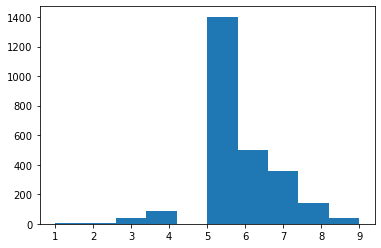

In [35]:
plt.hist(tdata.OverallCond)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

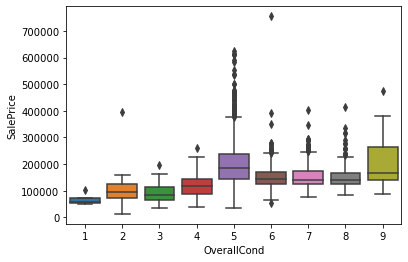

In [36]:
sns.boxplot(x='OverallCond',y='SalePrice',data=tdata)

## OverallCondBinary
-below average y or no 

In [37]:
tdata['OverallCondBinary']=(tdata['OverallCond']<5).astype(int)

## GeoRefNo

In [38]:
sum(tdata.GeoRefNo.isna())

21

In [39]:
#nothing I can do about these nas rn- will become an issue for computing distance
#to college. at that time we can impute the avrg distance or since small # instances do manually if
#they have an address

#themissing21 = indices of these rows  in case want to drop 

## Prop_Addr

In [40]:
sum((tdata.Prop_Addr.isna()))#&(tdata.GeoRefNo.isna()))
#same 21 w no address- nothing can do bout that 


21

## SchD_S
-binary- 1 means school dist 5 else dist 1

In [41]:
sum((tdata.SchD_S.isna()) &(tdata.GeoRefNo.isna()))
#same 21 w no address- impute mode

21

In [42]:
tdata.SchD_S.value_counts()

1.0    2229
5.0     330
Name: SchD_S, dtype: int64

In [43]:
tdata.SchD_S[tdata.SchD_S.isna()]=1.0

<ipython-input-43-6fb3b8e8450f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.SchD_S[tdata.SchD_S.isna()]=1.0


In [44]:
tdata['SchD_S'] = np.where(tdata['SchD_S']== 5.0, 1, 0)

In [45]:
sum(tdata['SchD_S']==1)

330

## TxD_S 
-this is perfectly corr w school dist- drop 

In [46]:
sum((tdata.TxD_S.isna()))

21

In [47]:
tdata.TxD_S.value_counts()

1.0     2229
45.0     330
Name: TxD_S, dtype: int64

In [48]:
tdata.TxD_S[tdata.TxD_S.isna()]=1.0
tdata['TxD_S'] = np.where(tdata['TxD_S']== 45.0, 1, 0)

<ipython-input-48-c4b4d3829437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.TxD_S[tdata.TxD_S.isna()]=1.0


In [49]:
tdata=tdata.drop(columns='TxD_S')

## LndAc_S
-thinking bout filling in the nas and zeros with the avrg land ac size for the given lot area cause theyre roughly corr and rando avrg might not make sense
-hypothesize we will see some correlations in cols 

In [50]:
sum((tdata.LndAc_S.isna()) )

21

In [51]:
themissing21=tdata.index[(tdata.LndAc_S.isna())].tolist()

In [52]:
tdata[tdata.LndAc_S==0]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,OthAc_S,HSTtl_D,HSTtl_S,GLA,HasGarage,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,OverallCondBinary
904,904,910206010,845,68104,50,RM,64.0,11067,Pave,NaN,...,0.0,NaN,NaN,NaN,1,1,True,0,0,1


In [53]:
tdata.LndAc_S.value_counts()

44000.0     13
43700.0     12
36800.0     12
41700.0     12
40200.0     12
            ..
100400.0     1
80300.0      1
68900.0      1
123300.0     1
87700.0      1
Name: LndAc_S, Length: 772, dtype: int64

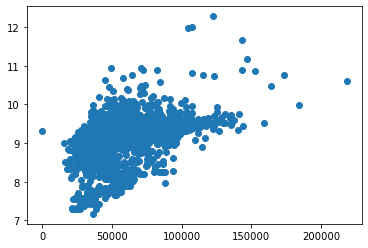

In [54]:
plt.scatter(tdata['LndAc_S'], np.log(tdata['LotArea']))
#vis corr w lot area 

In [55]:
#tdata.LndAc_S[tdata.LndAc_S==0]=tdata.LotArea[tdata.LotArea==]
LA=int(tdata[tdata.LndAc_S==0].LotArea)
tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()
)

<ipython-input-55-d0741030846e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()


In [56]:
list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())

[79,
 109,
 404,
 495,
 558,
 680,
 683,
 895,
 1088,
 1204,
 1346,
 1516,
 1578,
 2011,
 2139,
 2168,
 2203,
 2228,
 2323,
 2525,
 2531]

In [57]:
imputedvals=[]
keysofnas=list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())
for i in range(sum(tdata.LndAc_S.isna())):
    LA=tdata.loc[keysofnas[i],'LotArea']
    imputedvals.append(round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean())
    )  

In [58]:
tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals

<ipython-input-58-90775d9f79f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals


In [59]:
tdata.loc[109,'LndAc_S']

54033.0

## OthAc_S
-we need to drop either this or lndac_s asap due to corr- didnt even need a test just visually 


In [60]:
sum((tdata.OthAc_S.isna()) )

21

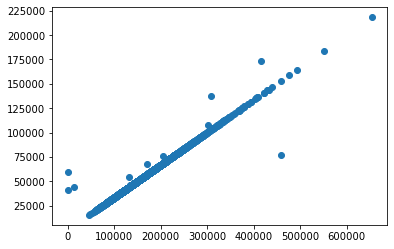

In [61]:
plt.scatter(tdata['OthAc_S'], (tdata['LndAc_S']))

In [62]:
tdata=tdata.drop(columns='OthAc_S')